In [135]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
from PIL import Image
from skimage import transform

img_height = 255
img_width = 255

Found 2146 files belonging to 3 classes.
Using 1932 files for training.
Found 2146 files belonging to 3 classes.
Using 214 files for validation.
[<tf.Tensor: shape=(28, 256, 256, 1), dtype=float32, numpy=
array([[[[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        ...,

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         ...,
         [  0.],
         [  0.],
         [  0.]]],


       [[[206.],
         [206.],
         [205.],
         ...,
      

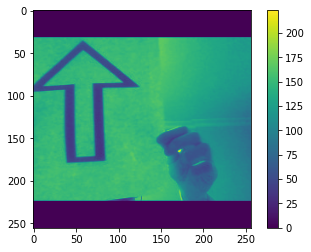

In [155]:
ds_train= tf.keras.preprocessing.image_dataset_from_directory(
    'images',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    shuffle=True,
    seed = 123,
    validation_split=0.1,
    subset="training",
    batch_size=28

    # image_size=(img_height,img_width)

)

ds_val= tf.keras.preprocessing.image_dataset_from_directory(
    'images',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    shuffle=True,
    seed = 123,
    validation_split=0.1,
    subset="validation",
    # image_size=(img_height,img_width)
    batch_size=28
    
    
)



plt.imshow([x for x,y in ds_val][0][0])
print([x for x,y in ds_val])
print([y for x,y in ds_val])
plt.colorbar()
plt.grid(False)
plt.show()



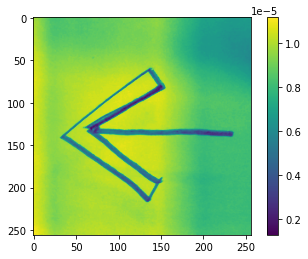

In [141]:
def augment(x,y):
    image = tf.image.random_brightness(x,max_delta=0.05)
    image/=255
    return image,y

ds_train = ds_train.map(augment)

def aug1(x,y):
    return x/255,y

ds_val = ds_val.map(aug1)

plt.imshow([x for x,y in ds_val][0][6])
plt.colorbar()
plt.grid(False)
plt.show()

In [138]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(3,activation='sigmoid')
])

model.compile(
    optimizer="Adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    
)

model.fit(ds_train,epochs=15)





Epoch 1/15
69/69 [==============================] - 2s 23ms/step - loss: 2.3768 - accuracy: 0.4053
Epoch 2/15
69/69 [==============================] - 2s 24ms/step - loss: 0.8987 - accuracy: 0.6149
Epoch 3/15
69/69 [==============================] - 2s 22ms/step - loss: 0.6145 - accuracy: 0.7340
Epoch 4/15
69/69 [==============================] - 2s 24ms/step - loss: 0.6872 - accuracy: 0.7189
Epoch 5/15
69/69 [==============================] - 2s 23ms/step - loss: 0.5726 - accuracy: 0.7376
Epoch 6/15
69/69 [==============================] - 2s 22ms/step - loss: 0.5963 - accuracy: 0.7365
Epoch 7/15
69/69 [==============================] - 2s 23ms/step - loss: 0.4675 - accuracy: 0.8049
Epoch 8/15
69/69 [==============================] - 2s 22ms/step - loss: 0.6286 - accuracy: 0.7686
Epoch 9/15
69/69 [==============================] - 2s 23ms/step - loss: 0.4118 - accuracy: 0.8370
Epoch 10/15
69/69 [==============================] - 2s 23ms/step - loss: 0.4816 - accuracy: 0.8002
Epoch 11/

7/7 [==============================] - 0s 15ms/step
0
tf.Tensor(2, shape=(), dtype=int32)


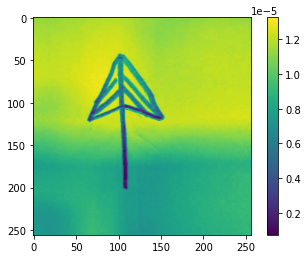

In [143]:
pred = model.predict(ds_val)


print(np.argmax(pred[1]))
plt.imshow([x for x,y in ds_val][0][1])
# print([y for x,y in ds_val][0][1])
plt.colorbar()
plt.grid(False)
plt.show()